In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
df=pd.read_csv(r'C:\Users\rajak\OneDrive\Documents\DATA\100-days-of-machine-learning\day24-standardization\Social_Network_Ads.csv')

In [215]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [216]:
df=df.iloc[:,2:]


In [217]:
df.sample(5)
X=df.drop('Purchased',axis=1)
y=df['Purchased']

In [218]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [219]:
X_train.shape

(280, 2)

In [220]:
X_test.shape

(120, 2)

# Standard Scaler

In [221]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [222]:
scaler.fit(X_train)

StandardScaler()

In [223]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [224]:
scaler.mean_

array([3.75821429e+01, 7.01035714e+04])

In [225]:
X_train

,Age,EstimatedSalary
399,49,36000
25,47,20000
279,50,36000
260,35,77000
130,31,58000
...,...,...
369,54,26000
320,52,138000
15,29,80000
125,39,61000


In [226]:
X_train_scaled

array([[ 1.10639192, -0.98126643],
       [ 0.91259164, -1.44163648],
       [ 1.20329206, -0.98126643],
       [-0.25021   ,  0.19843182],
       [-0.63781054, -0.34825761],
       [ 0.42809096, -0.17561884],
       [ 0.5249911 ,  1.69463449],
       [ 0.71879137, -1.38409022],
       [-0.83161082, -0.77985453],
       [ 1.97849315,  0.71634813],
       [ 0.33119082, -0.54966951],
       [-0.25021   ,  0.77389439],
       [-0.83161082,  0.14088557],
       [ 0.23429069, -0.37703074],
       [ 0.33119082, -1.1539052 ],
       [ 1.88159301,  0.11211244],
       [ 0.71879137, -1.09635894],
       [-0.44401027, -1.21145146],
       [-0.25021   ,  2.21255079],
       [-0.25021   , -0.26193823],
       [ 0.13739055,  0.08333931],
       [ 1.10639192,  0.54370936],
       [ 1.00949178, -1.1539052 ],
       [ 1.30019219,  2.18377766],
       [-1.02541109,  0.74512126],
       [ 1.5908926 ,  0.97530628],
       [-0.25021   , -1.24022458],
       [ 0.33119082,  0.05456618],
       [ 1.00949178,

In [227]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled

,Age,EstimatedSalary
0,1.106392,-0.981266
1,0.912592,-1.441636
2,1.203292,-0.981266
3,-0.250210,0.198432
4,-0.637811,-0.348258
...,...,...
275,1.590893,-1.268998
276,1.397092,1.953593
277,-0.831611,0.284751
278,0.137391,-0.261938


In [228]:
X_test_scaled=pd.DataFrame(X_test,columns=X_test.columns)
X_test_scaled

,Age,EstimatedSalary
332,42,65000
111,37,71000
352,42,90000
205,47,47000
56,23,48000
...,...,...
17,45,26000
225,37,53000
223,60,102000
59,32,117000


In [229]:
np.round(X_train.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,37.58,70103.57
std,10.34,34816.88
min,18.00,15000.00
25%,30.00,43000.00
50%,37.00,70000.00
75%,46.00,88250.00
max,60.00,150000.00


In [230]:
np.round(X_train_scaled.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.90,-1.59
25%,-0.73,-0.78
50%,-0.06,-0.00
75%,0.82,0.52
max,2.17,2.30


# Effect Of Scaling

Text(0.5, 1.0, 'After Scaling')

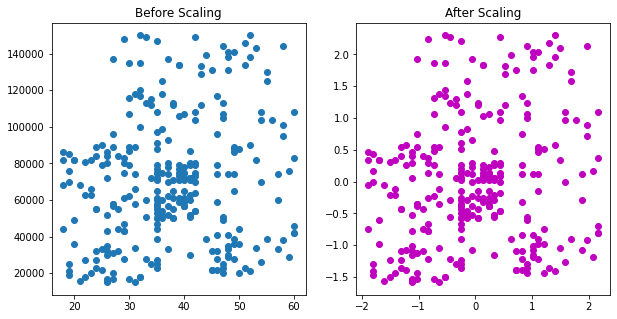

In [231]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='m')
ax2.set_title('After Scaling')

<AxesSubplot:title={'center':'After Scaling'}, xlabel='Age', ylabel='Density'>

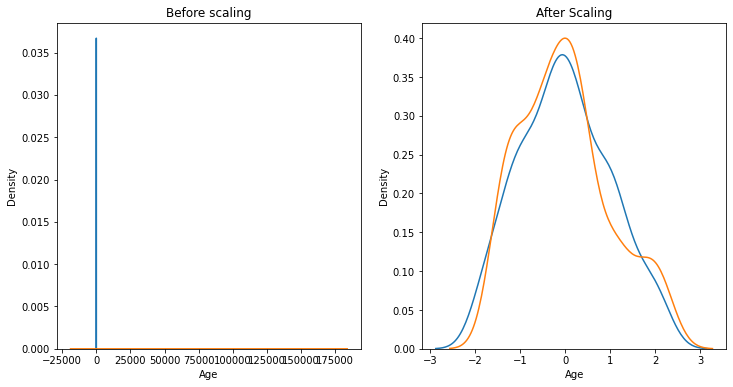

In [232]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,6))
ax1.set_title('Before scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

# Comparision of Distribution

<AxesSubplot:title={'center':'After Scaling'}, xlabel='Age', ylabel='Density'>

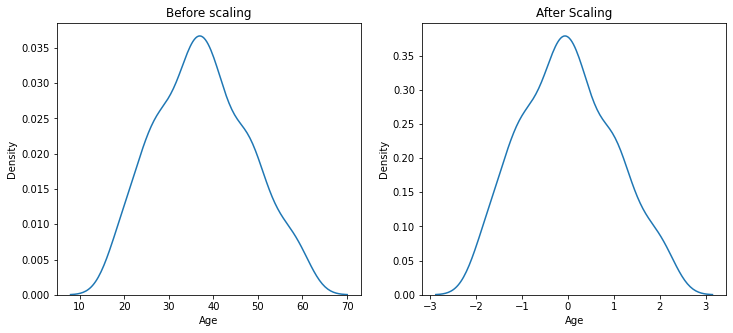

In [233]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)

<AxesSubplot:title={'center':'After Scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

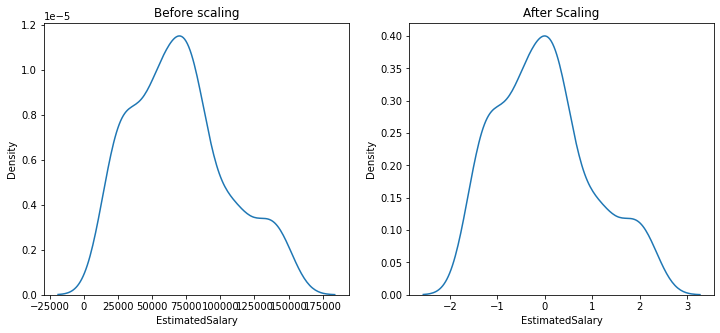

In [234]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before scaling')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

# Why Scaling is im portant?

In [235]:
from sklearn.linear_model import LogisticRegression 

In [236]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [237]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [238]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [239]:
from sklearn.metrics import accuracy_score

In [240]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6916666666666667
Scaled 0.30833333333333335


In [241]:
accuracy_score(y_hat_scaled,y_test)

0.30833333333333335

In [242]:
from sklearn.tree import DecisionTreeClassifier

In [243]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [244]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [245]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [246]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.30833333333333335


In [247]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

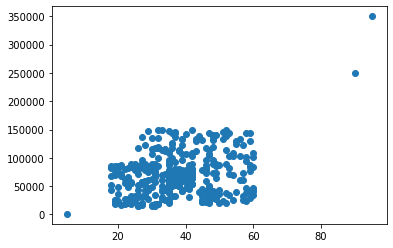

In [248]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [249]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [250]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [251]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

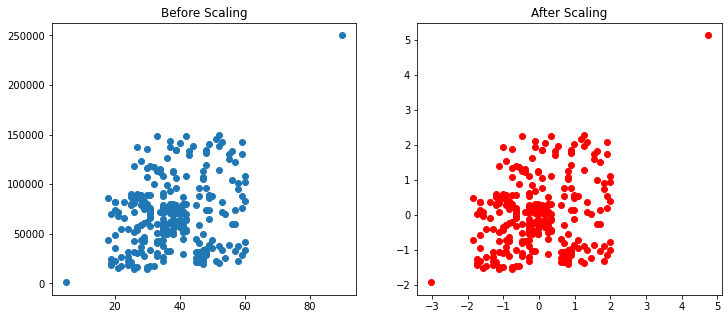

In [252]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()